# 1. Import Libraries

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import xgboost as xgb
import lightgbm as lgb
from sklearn.datasets import load_wine
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 2. Load Dataset


In [3]:
wine = load_wine() # load dataset
data_df = pd.DataFrame(wine.data, columns=wine.feature_names)
data_df['Target'] = wine.target
data_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  Targe

In [5]:
miss = data_df.isnull().sum().to_frame(name='Missing Count')
miss['Missing Percentage'] = miss['Missing Count'] / len(data_df) * 100
miss = miss.sort_values(by='Missing Count', ascending=False)
print("\nMissing Values in Each Column:\n", miss)


Missing Values in Each Column:
                               Missing Count  Missing Percentage
alcohol                                   0                 0.0
malic_acid                                0                 0.0
ash                                       0                 0.0
alcalinity_of_ash                         0                 0.0
magnesium                                 0                 0.0
total_phenols                             0                 0.0
flavanoids                                0                 0.0
nonflavanoid_phenols                      0                 0.0
proanthocyanins                           0                 0.0
color_intensity                           0                 0.0
hue                                       0                 0.0
od280/od315_of_diluted_wines              0                 0.0
proline                                   0                 0.0
Target                                    0                 0.0


Target column: Target
        count    pct
Target              
1          71  39.89
0          59  33.15
2          48  26.97


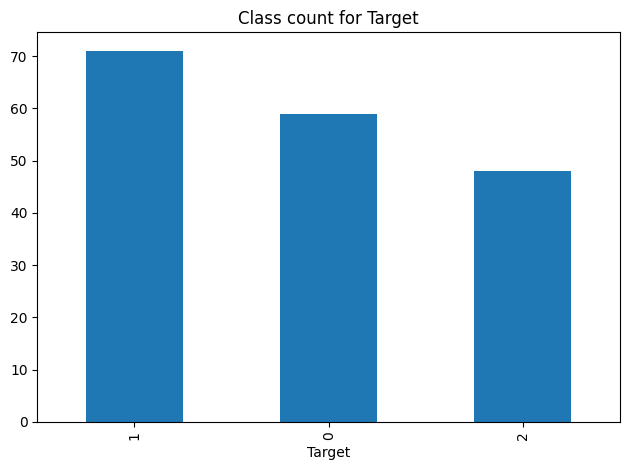

,count,pct
Target,,
1,71,39.89
0,59,33.15
2,48,26.97


In [6]:
def class_balance(df: pd.DataFrame, target: str):
    print(f"Target column:", target)
    vc = df["Target"].value_counts(dropna=False).to_frame('count')
    vc['pct'] =  (vc['count'] / vc['count'].sum() * 100).round(2)
    print(vc)
    # Bar plot
    vc['count'].plot(kind= 'bar')
    plt.title(f'Class count for {target}')
    plt.tight_layout()
    plt.show()
    return vc

class_balance(data_df, 'Target')

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


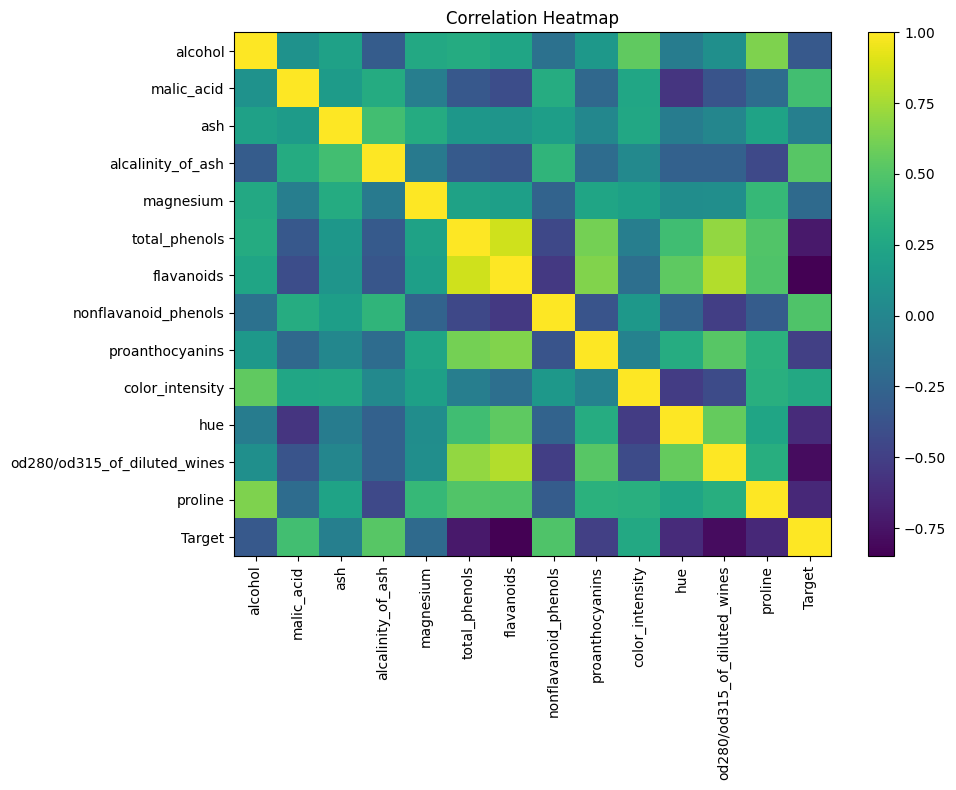

In [7]:
from typing import Optional

def corr_heatmap(df: pd.DataFrame, max_cols: int = 15, savepath: Optional[str] = None):
    num_cols = [c for c in df.columns if pd.api.types.is_numeric_dtype(df[c])]
    cols = num_cols[:max_cols]
    corr = df[cols].corr()
    plt.figure(figsize=(min(10, len(cols)), min(8, len(cols))))
    plt.imshow(corr.values, interpolation='nearest', aspect='auto')
    plt.colorbar()
    plt.xticks(ticks=np.arange(len(cols)), labels=cols, rotation=90)
    plt.yticks(ticks=np.arange(len(cols)), labels=cols)
    plt.title('Correlation Heatmap')
    plt.tight_layout()
    if savepath:
        plt.savefig(savepath)
        plt.show()
    return corr

corr_heatmap(data_df, max_cols=15)

# 3. Split The Dataset

In [8]:
X, y = data_df.drop(columns=['Target']), data_df['Target']
X_train,X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
print(f'Number of training samples: {X_train.shape[0]}')
print(f'Number of val samples: {X_test.shape[0]}')

Number of training samples: 142
Number of val samples: 36


# 4. Training

In [10]:
xg_class = xgb.XGBClassifier()

In [11]:
import time 

start_time = time.time()
xg_class.fit(X_train, y_train)
end_time = time.time()
print(f"Training time: {end_time - start_time:.4f} seconds")

Training time: 0.4341 seconds


In [12]:
preds = xg_class.predict(X_test)


In [13]:
train_acc = accuracy_score(y_train, xg_class.predict(X_train))
test_acc = accuracy_score(y_test, preds)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Train Accuracy: 1.0000
Test Accuracy: 0.9444


# LightGBM

In [17]:
lgb_class = lgb.LGBMClassifier(
    objective='multiclass',
    num_class=3,
    learning_rate=0.2,
    n_estimators=50,
    # early_stopping_rounds=10,
    random_state=42
)

start_time = time.time()
lgb_class.fit(X_train, y_train)
end_time = time.time()

print(f"Training time: {end_time - start_time:.4f} seconds")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000051 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 142, number of used features: 13
[LightGBM] [Info] Start training from score -1.149165
[LightGBM] [Info] Start training from score -0.912776
[LightGBM] [Info] Start training from score -1.266948
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

In [18]:
preds = lgb_class.predict(X_test)

train_acc = accuracy_score(y_train, lgb_class.predict(X_train))
test_acc = accuracy_score(y_test, preds)

print(f"Training accuracy: {train_acc:.4f}")
print(f"Testing accuracy: {test_acc:.4f}")

Training accuracy: 1.0000
Testing accuracy: 1.0000
